In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
dataset = pd.read_csv("/kaggle/input/glass/glass.csv")

In [26]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
dataset.isnull().sum().sum()

0

In [28]:
dataset["Type"].unique()

array([1, 2, 3, 5, 6, 7])

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [30]:
dataset.shape

(214, 10)

<AxesSubplot: xlabel='Type', ylabel='Count'>

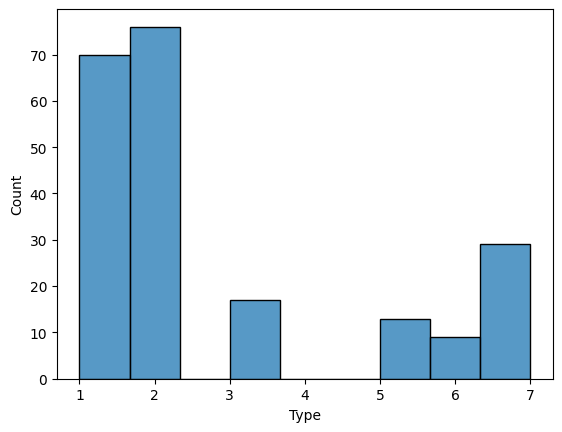

In [31]:
sns.histplot(dataset["Type"])

In [32]:
x = dataset.drop(["Type"],axis=1)
y  = dataset["Type"]
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [33]:
x = pd.get_dummies(x)
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [35]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [36]:
x_test.shape, x_train.shape

((43, 9), (171, 9))

In [37]:
y_test.shape, y_train.shape

((43,), (171,))

In [38]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [39]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [40]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[7] <= 0.335\ngini = 0.738\nsamples = 171\nvalue = [51, 64, 11, 12, 8, 25]'),
 Text(0.3076923076923077, 0.625, 'x[3] <= 1.42\ngini = 0.68\nsamples = 147\nvalue = [50, 64, 11, 11, 8, 3]'),
 Text(0.15384615384615385, 0.375, 'x[2] <= 3.86\ngini = 0.619\nsamples = 87\nvalue = [46, 26, 9, 1, 3, 2]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.602\nsamples = 81\nvalue = [46, 20, 9, 1, 3, 2]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 2.26\ngini = 0.558\nsamples = 60\nvalue = [4, 38, 2, 10, 5, 1]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.611\nsamples = 18\nvalue = [0, 3, 0, 10, 4, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.294\nsamples = 42\nvalue = [4, 35, 2, 0, 1, 0]'),
 Text(0.8461538461538461, 0.625, 'x[2] <= 3.42\ngini = 0.156\nsamples = 24\nvalue = [1, 0, 0, 1, 0, 22]'),
 Text(0.7692307692307693, 0.375, 'x[3] <= 3.19\ngini = 0.083\nsamples = 23\nvalu

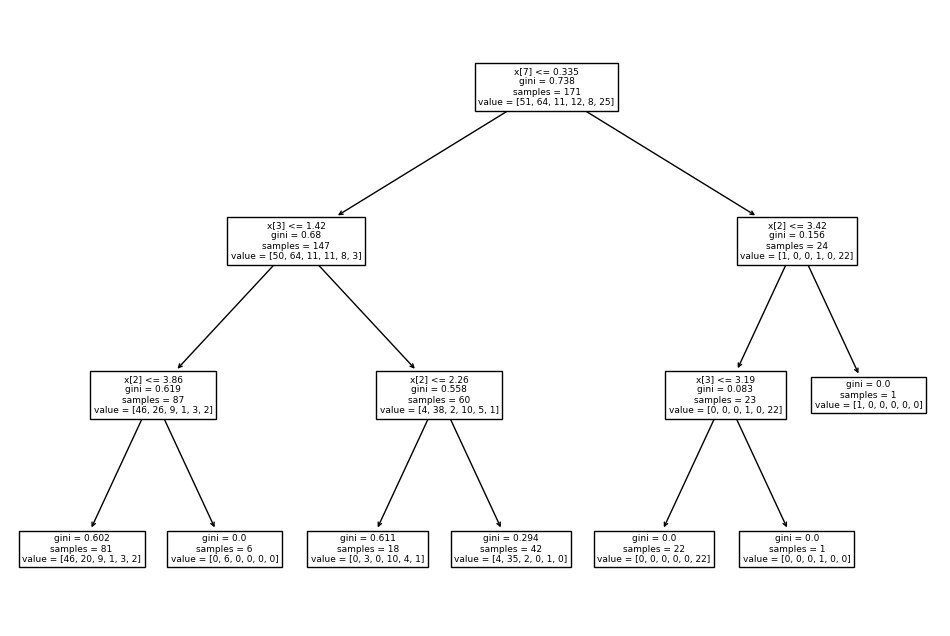

In [41]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [42]:
y_pred_gini = clf_gini.predict(x_test)

In [43]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 5, 0, 0, 0, 1, 5, 0, 0, 1, 1, 3, 0, 5, 0, 5, 5, 1, 1, 1, 1, 0,
       0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 5, 5, 0, 3, 0, 5, 1, 0,
       0, 0, 3, 1, 3, 5, 0, 0, 1, 5, 0, 3, 1, 1, 5, 5, 0, 5, 0, 5, 5, 0,
       1, 0, 0, 0, 5, 3, 1, 0, 5, 3, 5, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 3,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 5, 0, 1,
       3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 3, 0, 0, 1, 3, 0, 5, 1, 1, 5, 1, 1, 1, 0])

In [44]:
print("gini model accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))
print("training set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train_gini)))

gini model accuracy : 0.6279
training set accuracy score: 0.7076


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [46]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n", cm)

confusion matrix

 [[16  3  0  0  0  0]
 [ 5  6  0  0  0  1]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  4]]


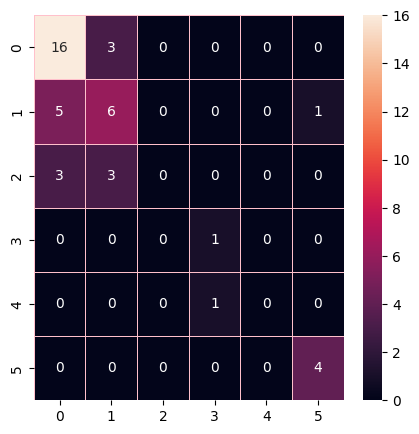

<Figure size 640x480 with 0 Axes>

In [47]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="pink", fmt=".0f", ax=ax)
plt.show()
plt.savefig("confusion matrix")

In [48]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        19
           1       0.50      0.50      0.50        12
           2       0.00      0.00      0.00         6
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       0.80      1.00      0.89         4

    accuracy                           0.63        43
   macro avg       0.41      0.56      0.47        43
weighted avg       0.52      0.63      0.57        43



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import f1_score

f1_score_micro = f1_score(y_test, y_pred_gini, average='micro')
f1_score_macro = f1_score(y_test, y_pred_gini, average='macro')

print("f1 score (micro)", f1_score_micro)
print("f1 score (macro)", f1_score_macro)


f1 score (micro) 0.627906976744186
f1 score (macro) 0.46662360034453054
